**Loading the dataset**

In [ ]:
#loading the dataset
import numpy as np
import pandas as pd
df=pd.read_csv("/content/CLEAN- PCOS SURVEY SPREADSHEET (2).csv")

**Preprocessing the dataset**


In [ ]:
#displaying the column names for further process
df.columns.tolist()



['Age (in Years)',
 'Weight (in Kg)',
 'Height (in Cm / Feet)',
 'Can you tell us your blood group ?',
 'After how many months do you get your periods?\n(select 1- if every month/regular)',
 'Have you gained weight recently?',
 'Do you have excessive body/facial hair growth ?',
 'Are you noticing skin darkening recently?',
 'Do have hair loss/hair thinning/baldness ?',
 'Do you have pimples/acne on your face/jawline ?',
 'Do you eat fast food regularly ?',
 'Do you exercise on a regular basis ?',
 'Have you been diagnosed with PCOS/PCOD?',
 'Do you experience mood swings ?',
 'Are your periods regular ?',
 'How long does your period last ? (in Days)\nexample- 1,2,3,4.....']

In [ ]:
column_mapping = {
     "Age (in Years)" :"Age",
     "Weight (in Kg)" :"Weight",
     "Height (in Cm / Feet)" : "Height",
     "Can you tell us your blood group ?":"Blood_Group",
    "After how many months do you get your periods?\n(select 1- if every month/regular)": "Period_Freq",
    "Have you gained weight recently?": "Weight_Gain",
    "Do you have excessive body/facial hair growth ?": "Facial_Hair_Growth",
    "Are you noticing skin darkening recently?": "Skin_Darkening",
    "Do have hair loss/hair thinning/baldness ?": "Hair_Loss",
    "Do you have pimples/acne on your face/jawline ?": "Acne",
    "Do you eat fast food regularly ?": "Fast_Food",
    "Do you exercise on a regular basis ?": "Exercise",
    "Have you been diagnosed with PCOS/PCOD?": "PCOS_Diagnosed",
    "Do you experience mood swings ?": "Mood_Swings",
    "Are your periods regular ?": "Regular_Periods",
    "How long does your period last ? (in Days)\nexample- 1,2,3,4.....": "Period_Duration"
}

# Apply renaming
df.rename(columns=column_mapping, inplace=True)


In [ ]:
df.columns

Index(['Age', 'Weight', 'Height', 'Blood_Group', 'Period_Freq', 'Weight_Gain',
       'Facial_Hair_Growth', 'Skin_Darkening', 'Hair_Loss', 'Acne',
       'Fast_Food', 'Exercise', 'PCOS_Diagnosed', 'Mood_Swings',
       'Regular_Periods', 'Period_Duration'],
      dtype='object')

**Normalizing the numerical columns**

In [ ]:
#selecting the numerical columns to normalize
numerical_columns=["Age","Weight","Height","Period_Duration"]

#importing minmax scaler
from sklearn.preprocessing import MinMaxScaler
minmaxscaler=MinMaxScaler()
df[numerical_columns]=minmaxscaler.fit_transform(df[numerical_columns])

#displaying cleaned dataset info and frst five rows
#df.info()
#df.head()

**Applying OHE for bloodgroups**

In [ ]:
df = pd.get_dummies(df, columns=['Blood_Group'], prefix='BG')
df[['BG_11', 'BG_12', 'BG_13', 'BG_14', 'BG_15', 'BG_16']] = df[['BG_11', 'BG_12', 'BG_13', 'BG_14', 'BG_15', 'BG_16']].astype(int)


In [ ]:
df.columns


Index(['Age', 'Weight', 'Height', 'Period_Freq', 'Weight_Gain',
       'Facial_Hair_Growth', 'Skin_Darkening', 'Hair_Loss', 'Acne',
       'Fast_Food', 'Exercise', 'PCOS_Diagnosed', 'Mood_Swings',
       'Regular_Periods', 'Period_Duration', 'BG_11', 'BG_12', 'BG_13',
       'BG_14', 'BG_15', 'BG_16'],
      dtype='object')

**Analyzing AIC/BIC scores to choose the number of clusters**

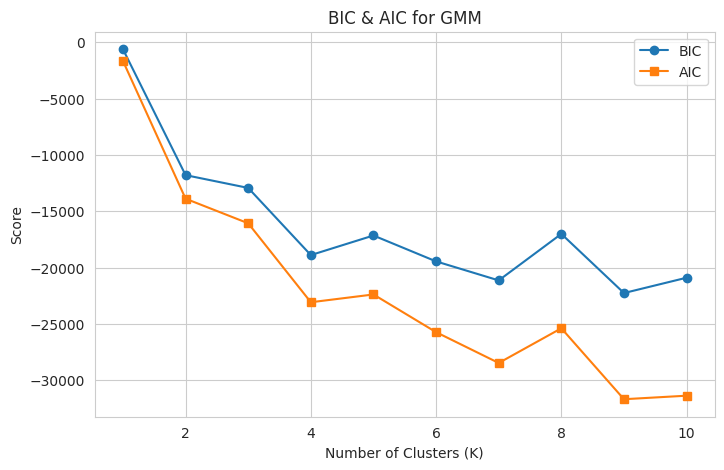

In [ ]:
import matplotlib.pyplot as plt
from sklearn.mixture import GaussianMixture
bic_scores = []
aic_scores = []
num_clusters = range(1, 11)  # Test K values from 1 to 10

for k in num_clusters:
    gmm = GaussianMixture(n_components=k, random_state=42)
    gmm.fit(df)
    bic_scores.append(gmm.bic(df))  # BIC score
    aic_scores.append(gmm.aic(df))  # AIC score

# Plot BIC & AIC
plt.figure(figsize=(8, 5))
plt.plot(num_clusters, bic_scores, label='BIC', marker='o')
plt.plot(num_clusters, aic_scores, label='AIC', marker='s')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Score')
plt.title('BIC & AIC for GMM')
plt.legend()
plt.show()



**Implementing the GMM to create clusters**

In [ ]:
from sklearn.preprocessing import LabelEncoder
from sklearn.mixture import GaussianMixture
import pickle
# Identifying categorical columns
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()
print("Categorical Columns:", categorical_cols)
# apply GMM
model = GaussianMixture(n_components=4, random_state=42)
df["Cluster_label"] = model.fit_predict(df)
#mapping = {0: "A", 1: "B", 2: "C", 3: "D"}
#df["Cluster_label"] = df["Cluster_label"].map(mapping)

df.head()




Categorical Columns: []


,Age,Weight,Height,Period_Freq,Weight_Gain,Facial_Hair_Growth,Skin_Darkening,Hair_Loss,Acne,Fast_Food,...,Mood_Swings,Regular_Periods,Period_Duration,BG_11,BG_12,BG_13,BG_14,BG_15,BG_16,Cluster_label
0,0.177778,0.208955,0.901099,1,0,0,0,0,0,0,...,1,1,0.400000,0,0,1,0,0,0,1
1,0.177778,0.179104,0.835165,1,0,0,1,1,1,0,...,1,1,0.266667,1,0,0,0,0,0,2
2,0.088889,0.059701,0.868132,1,0,0,0,0,1,1,...,1,1,0.400000,0,0,0,0,1,0,3
3,0.333333,0.313433,0.857143,1,0,0,0,0,0,0,...,1,1,0.266667,0,0,0,0,1,0,3
4,0.711111,0.104478,0.802198,2,0,0,0,1,0,0,...,1,0,0.466667,0,0,1,0,0,0,0


**Saving the model**

In [ ]:
import pickle
with open("gmm_model.pkl", "wb") as file:
    pickle.dump(model, file)

**Analyzing the clusters**

In [ ]:
#how many individuals are there in each cluster
df["Cluster_label"].value_counts()

,count
Cluster_label,
1,155
3,149
2,100
0,61


In [ ]:
df.groupby("Cluster_label").mean()

,Age,Weight,Height,Period_Freq,Weight_Gain,Facial_Hair_Growth,Skin_Darkening,Hair_Loss,Acne,Fast_Food,...,PCOS_Diagnosed,Mood_Swings,Regular_Periods,Period_Duration,BG_11,BG_12,BG_13,BG_14,BG_15,BG_16
Cluster_label,,,,,,,,,,,,,,,,,,,,,
0,0.281603,0.447884,0.850297,2.196721,0.639344,0.540984,0.557377,0.688525,0.459016,0.377049,...,0.721311,0.836066,0.000000,0.330055,0.0,0.016393,0.737705,0.000000,0.163934,0.081967
1,0.276416,0.379345,0.843334,1.025806,0.451613,0.200000,0.270968,0.619355,0.335484,0.348387,...,0.103226,0.729032,1.000000,0.303656,0.0,0.038710,0.935484,0.000000,0.000000,0.025806
2,0.313556,0.414627,0.850643,1.180000,0.570000,0.260000,0.300000,0.610000,0.410000,0.300000,...,0.200000,0.750000,0.800000,0.293333,1.0,0.000000,0.000000,0.000000,0.000000,0.000000
3,0.250559,0.368156,0.842946,1.053691,0.449664,0.221477,0.342282,0.597315,0.476510,0.402685,...,0.147651,0.771812,0.872483,0.309172,0.0,0.000000,0.000000,0.107383,0.892617,0.000000


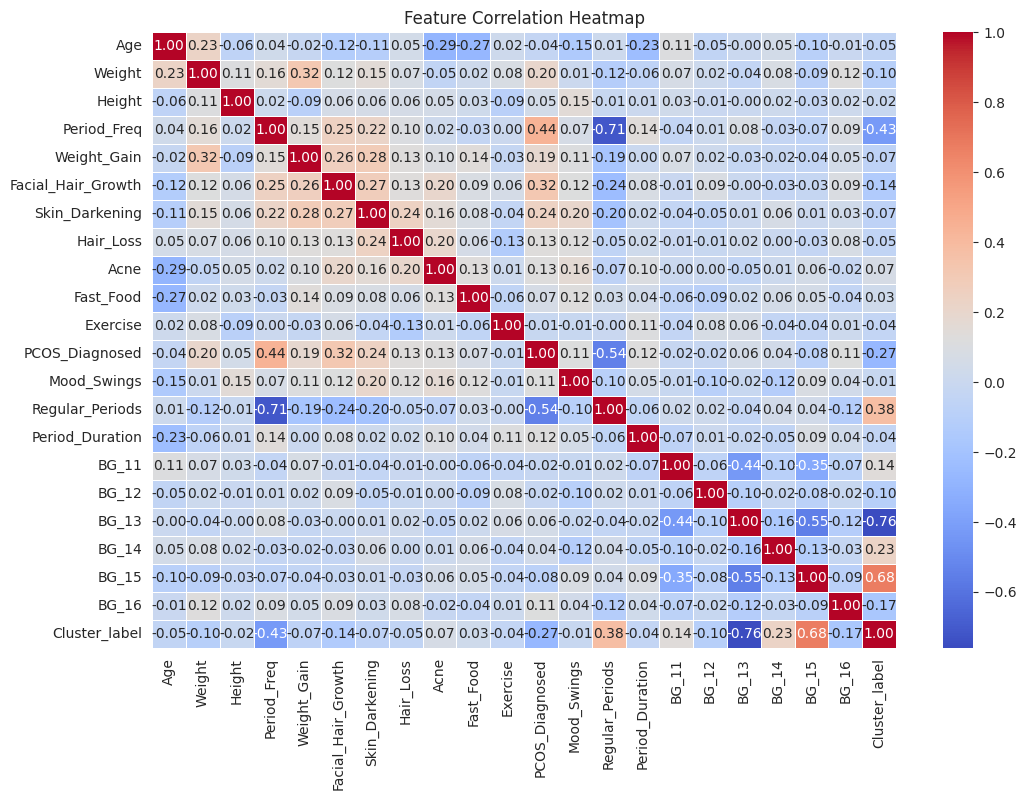

In [ ]:
import seaborn as sns
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.show()



<ipython-input-33-86d463dfe73c>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df["PCOS_Diagnosed"], y=df["Weight"], palette=["#1f77b4", "#ff7f0e"])


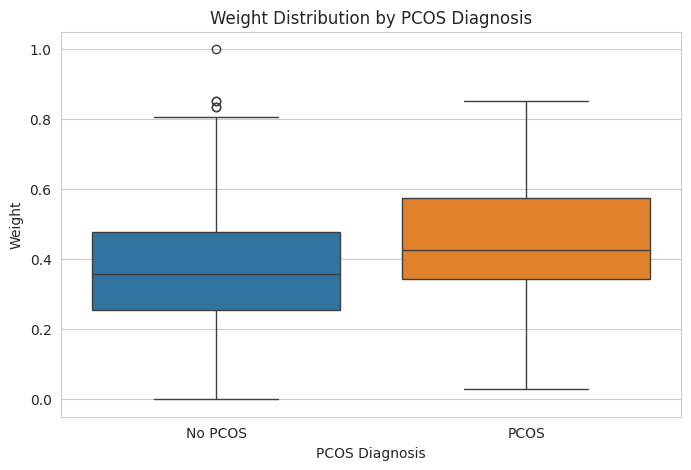

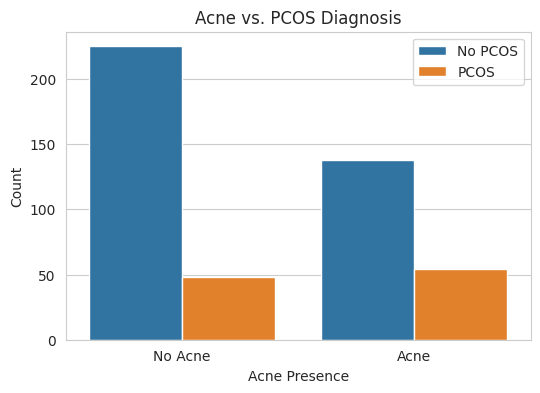

In [ ]:
# Boxplot of Weight vs. PCOS Diagnosis
plt.figure(figsize=(8, 5))
sns.boxplot(x=df["PCOS_Diagnosed"], y=df["Weight"], palette=["#1f77b4", "#ff7f0e"])
plt.xticks([0, 1], ["No PCOS", "PCOS"])
plt.xlabel("PCOS Diagnosis")
plt.ylabel("Weight")
plt.title("Weight Distribution by PCOS Diagnosis")
plt.show()
# Countplot of Acne vs. PCOS
plt.figure(figsize=(6, 4))
sns.countplot(x=df["Acne"], hue=df["PCOS_Diagnosed"], palette=["#1f77b4", "#ff7f0e"])
plt.xticks([0, 1], ["No Acne", "Acne"])
plt.xlabel("Acne Presence")
plt.ylabel("Count")
plt.title("Acne vs. PCOS Diagnosis")
plt.legend(["No PCOS", "PCOS"])
plt.show()
